In [1]:
# Seeding Seeds For Reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Importing Dependencies

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

Setup Kaggle API access

In [14]:
!mkdir -p ~/.kaggle
!cp "/content/AgroDiagnose/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
#Download the Plant Disease dataset
!kaggle datasets download -d abdallahalidev/plantvillage-dataset -p /content/AgroDiagnose

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 98% 2.00G/2.04G [00:18<00:00, 234MB/s]
100% 2.04G/2.04G [00:19<00:00, 115MB/s]


In [16]:
#Unzip the dataset
!unzip /content/AgroDiagnose/plantvillage-dataset.zip -d /content/AgroDiagnose/plantvillage-dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/AgroDiagnose/plantvillage-dataset/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: /content/AgroDiagnose/plantvillage-dataset/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: /content/AgroDiagnose/plantvillage-dataset/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: /content/AgroDiagnose/plantvillage-dataset/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: /content/AgroDiagnose/plantvillage-dataset/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a8

## Data PreProcessing

(256, 256, 3)


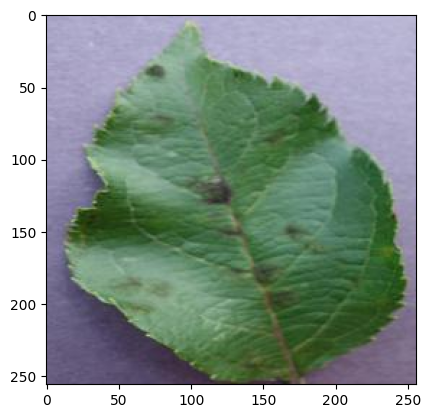

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

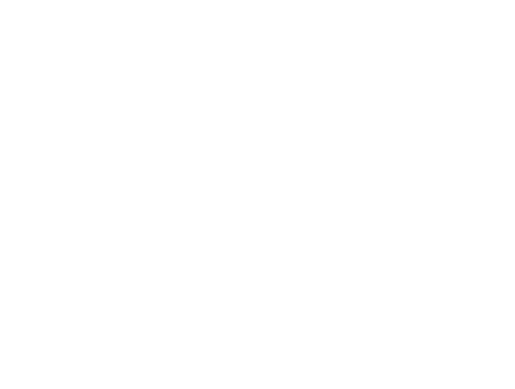

In [18]:
base_path = "/content/AgroDiagnose/plantvillage-dataset/color"
image_path = "/content/AgroDiagnose/plantvillage-dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"

img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.show()
plt.axis('off')

In [19]:
img_size = 224
batch_size =32

Image Generation

In [20]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

Train Generator

In [21]:
train_generator = data_gen.flow_from_directory(
    base_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


Validation Generator

In [22]:
validation_generator = data_gen.flow_from_directory(
    base_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


## Convolutional Neural Network

In [23]:
#Model
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,965,862 (45.65 MB)

 Trainable params: 11,965,862 (45.65 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training

In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,

    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,

)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1357/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5036 - loss: 1.9460

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 76ms/step - accuracy: 0.5038 - loss: 1.9450 - val_accuracy: 0.8044 - val_loss: 0.6473
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 138s 102ms/step - accuracy: 0.8506 - loss: 0.4883 - val_accuracy: 0.8207 - val_loss: 0.5877
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 100s 73ms/step - accuracy: 0.9296 - loss: 0.2232 - val_accuracy: 0.8491 - val_loss: 0.5323
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 144s 75ms/step - accuracy: 0.9627 - loss: 0.1194 - val_accuracy: 0.8525 - val_loss: 0.5789
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 105ms/step - accuracy: 0.9712 - loss: 0.0923 - val_accuracy: 0.8441 - val_loss: 0.7307


Model Evaluation

In [28]:
print("Evaluationg Model")

val_loss, val_accuracy = model.evaluate(validation_generator , steps = validation_generator.samples //batch_size)

print(f"Validation Accuracy: {val_accuracy* 100:.2f}%")

Evaluationg Model
339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.8419 - loss: 0.7367
Validation Accuracy: 84.41%


Plot

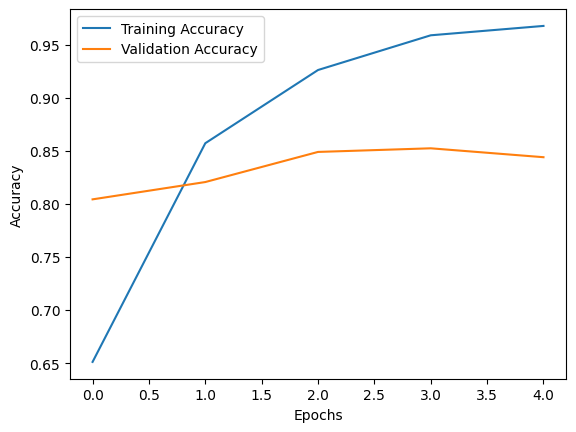

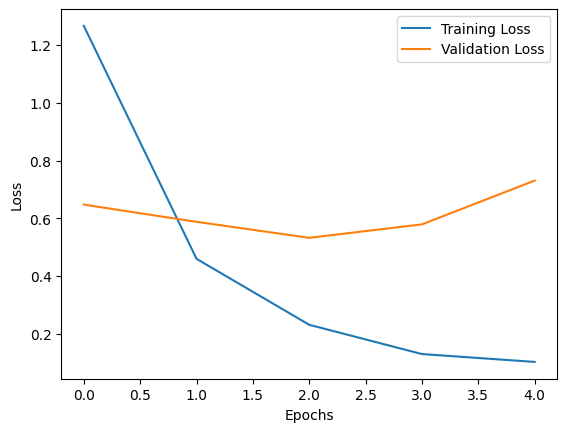

In [46]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Building a Predictive System

In [47]:
#function to load and preprocess the image

def load_and_preprocess_image(image_path, target_size=(224,224)):

    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0
    return img_array

#function to predict the class of a image
def predict_iamge_class(model, image_path , class_indices):
    preprocessed_image = load_and_preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(prediction, axis = 1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [48]:
#mapping
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [49]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [50]:
#save Model
import json
json.dump(class_indices, open('class_indices.json', 'w'))

In [51]:
#image_path = "/content/038464d1-47a9-4169-afb1-72c87e568a95___RS_GLSp 4480.jpg"
image_path = "/content/AgroDiagnose/plantvillage-dataset/color/Tomato___Septoria_leaf_spot/0025c401-7785-49c5-8bef-780a8a0d3652___Matt.S_CG 2694.JPG"

predicted_class_name = predict_iamge_class(model, image_path, class_indices)

print("The predicted class is:", {predicted_class_name})

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The predicted class is: {'Tomato___Bacterial_spot'}


In [52]:
model.save('/content/AgroDiagnose/plant_disease_prediction.h5')

In [53]:
model.save('/content/AgroDiagnose/plant_disease_prediction.keras')

In [ ]:
# Load the saved model and class indices
import tensorflow as tf
import json

model = tf.keras.models.load_model('/content/AgroDiagnose/plant_disease_prediction.keras')
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)
# Convert keys to integer if needed (from string during json dump)
class_indices = train_generator.class_indices


## Interface

In [54]:
!pip install streamlit==1.28.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 118.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: pillow
    Found existing 

In [55]:
!pip install pyngrok --quiet

In [56]:
%%writefile app.py
import streamlit as st
import numpy as np
import tensorflow as tf
from PIL import Image  # Import Image from PIL
import json

# Load the saved model and class indices
model = tf.keras.models.load_model('/content/drive/MyDrive/plant_disease_prediction.keras')
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)

# Preprocess the image
def preprocess_image(image):
    img = image.resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0
    return img_array

# Make predictions
def predict(image):
    preprocessed_image = preprocess_image(image)
    prediction = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class_name = class_indices.get(str(predicted_class_index), 'Unknown')
    return predicted_class_index, predicted_class_name

# Streamlit interface
st.title("Plant Disease Classifier")
st.write("Upload an image of a plant leaf to classify its disease.")

uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Classifying...")
    predicted_class_index, predicted_class_name = predict(image)  # Call the predict function
    st.write(f"Prediction Index: {predicted_class_index}")
    st.write(f"Prediction Name: {predicted_class_name}")

Writing app.py


In [1]:
ngrok.kill()

NameError: name 'ngrok' is not defined

In [2]:
from pyngrok import ngrok

# List active tunnels
!ngrok authtoken 2wmJDJexcPAyF6hdFl6qRjgNvX9_7QMssNYuTE7EtTeUZFxJB
active_tunnels = ngrok.get_tunnels()
print("Active tunnels:", active_tunnels)

# Check if there are already 3 active tunnels
if len(active_tunnels) >= 3:
    # Disconnect the oldest tunnel (you might need to adjust the index if you want to close a different one)
    ngrok.disconnect(active_tunnels[0].public_url)
    print("Disconnected tunnel:", active_tunnels[0].public_url)

# Connect a new tunnel for your Streamlit app
public_url = ngrok.connect(8501)  # 8501 is the default port for Streamlit
print(f"Public URL: {public_url}")

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Active tunnels: []
Public URL: NgrokTunnel: "https://c7b4-34-124-158-18.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.124.158.18:8501

2025-07-02 18:00:43.348056: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751479243.380791   28164 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751479243.388405   28164 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-02 18:00:43.412188: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate 